In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import pandas as pd
import PIL
import time
import os
from helper import get_car_paths, get_cars_df, get_car_data, get_effnet
import random

import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, models, transforms
from torch import nn
import torch.optim as optim

from fastai.vision import *

In [2]:
def seed_all(seed=42):
    random.seed(seed)
    torch.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    if torch.cuda.is_available(): 
        torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)

seed_all(seed=42)

# B3, size=(300x300), 60 Epochs, normalize(imagenet_stats), zoom_crop, cutout, wd=1e-5, LabelSmoothing, mixup

acc = 0.923219

In [5]:
try:
    learn.destroy()
    del learn
    gc.collect()
except Exception as e:
    print(e)

name 'learn' is not defined


In [6]:
xtra_tfms = zoom_crop(scale=(0.75,2.0), do_rand=True) + [cutout(n_holes=(1,4), length=(10, 50), p=0.8)]
tfms = get_transforms(xtra_tfms=xtra_tfms)
train_val_data, _ = get_train_test_data(tfms=tfms, bs=32, sz=(300, 300), normalize="imagenet")

In [7]:
eff_net = get_effnet(name="efficientnet-b3", pretrained=True, n_class=196)
learn = Learner(train_val_data, eff_net, loss_func=LabelSmoothingCrossEntropy(), 
                metrics=[accuracy], path='.', callback_fns=ShowGraph).mixup(alpha=0.2)
learn.to_fp16()

Getting pretrained efficientnet-b3
Loaded pretrained weights for efficientnet-b3
Parameter containing:
tensor([[ 0.0718, -0.0658, -0.0117,  ...,  0.0062,  0.0119,  0.0428],
        [ 0.0639, -0.0524, -0.0286,  ..., -0.0625,  0.0323, -0.0058],
        [ 0.0173,  0.0078, -0.0237,  ...,  0.0203, -0.0095,  0.0158],
        ...,
        [ 0.0250, -0.0226,  0.0317,  ...,  0.0056,  0.0121, -0.0259],
        [-0.0409,  0.0348,  0.0044,  ..., -0.0138, -0.0759, -0.0460],
        [-0.0812,  0.0199,  0.0363,  ..., -0.0296, -0.0574,  0.0551]],
       requires_grad=True)


Learner(data=ImageDataBunch;

Train: LabelList (6516 items)
x: ImageList
Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300)
y: CategoryList
Audi TTS Coupe 2012,Acura TL Sedan 2012,Dodge Dakota Club Cab 2007,Hyundai Sonata Hybrid Sedan 2012,Ford F-450 Super Duty Crew Cab 2012
Path: Data/cars_train;

Valid: LabelList (1628 items)
x: ImageList
Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300)
y: CategoryList
Plymouth Neon Coupe 1999,Honda Odyssey Minivan 2012,Aston Martin Virage Convertible 2012,Fisker Karma Sedan 2012,Audi S6 Sedan 2011
Path: Data/cars_train;

Test: None, model=EfficientNet(
  (_conv_stem): Conv2dSamePadding(3, 40, kernel_size=(3, 3), stride=(2, 2), bias=False)
  (_bn0): BatchNorm2d(40, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dSamePadding(40, 40, kernel_size

epoch,train_loss,valid_loss,accuracy,time
0,5.261452,5.082067,0.052211,01:34
1,4.779532,4.280972,0.179361,01:38
2,3.994647,3.061420,0.399263,01:36
3,3.234458,2.261507,0.583538,01:34
4,2.799880,2.046139,0.641892,01:36
5,2.634579,2.096601,0.628378,01:34
6,2.617093,2.025749,0.657862,01:33
7,2.637721,2.234322,0.604423,01:34
8,2.669004,2.420606,0.573710,01:35
9,2.699150,2.375306,0.552211,01:35


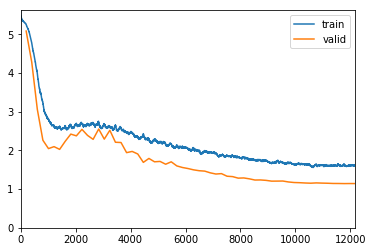

In [23]:
lr = 3e-3
wd = 1e-5
epochs = 60
learn.fit_one_cycle(epochs, max_lr=lr, wd=wd)

In [24]:
learn.save("b3_sz300_60epochs_004")

In [8]:
learn.load("b3_sz300_60epochs_004")

Learner(data=ImageDataBunch;

Train: LabelList (6516 items)
x: ImageList
Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300)
y: CategoryList
Audi TTS Coupe 2012,Acura TL Sedan 2012,Dodge Dakota Club Cab 2007,Hyundai Sonata Hybrid Sedan 2012,Ford F-450 Super Duty Crew Cab 2012
Path: Data/cars_train;

Valid: LabelList (1628 items)
x: ImageList
Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300)
y: CategoryList
Plymouth Neon Coupe 1999,Honda Odyssey Minivan 2012,Aston Martin Virage Convertible 2012,Fisker Karma Sedan 2012,Audi S6 Sedan 2011
Path: Data/cars_train;

Test: None, model=EfficientNet(
  (_conv_stem): Conv2dSamePadding(3, 40, kernel_size=(3, 3), stride=(2, 2), bias=False)
  (_bn0): BatchNorm2d(40, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dSamePadding(40, 40, kernel_size

In [9]:
learn.export("exported_models/exported.pkl")

# B3, size=(300x300), 60 Epochs, normalize(imagenet_stats), zoom_crop, wd=1e-5, LabelSmoothing, mixup

In [5]:
try:
    learn.destroy()
    del learn
    gc.collect()
except Exception as e:
    print(e)

name 'learn' is not defined


In [6]:
xtra_tfms = zoom_crop(scale=(0.75,2.0), do_rand=True)
tfms = get_transforms(xtra_tfms=xtra_tfms)
train_val_data, _ = get_train_test_data(tfms=tfms, bs=32, sz=(300, 300), normalize="imagenet")

In [7]:
eff_net = get_effnet(name="efficientnet-b3", pretrained=True, n_class=196)
learn = Learner(train_val_data, eff_net, loss_func=LabelSmoothingCrossEntropy(), 
                metrics=[accuracy], path='.', callback_fns=ShowGraph).mixup(alpha=0.2)
learn.to_fp16()

Getting pretrained efficientnet-b3
Loaded pretrained weights for efficientnet-b3
Parameter containing:
tensor([[ 0.0718, -0.0658, -0.0117,  ...,  0.0062,  0.0119,  0.0428],
        [ 0.0639, -0.0524, -0.0286,  ..., -0.0625,  0.0323, -0.0058],
        [ 0.0173,  0.0078, -0.0237,  ...,  0.0203, -0.0095,  0.0158],
        ...,
        [ 0.0250, -0.0226,  0.0317,  ...,  0.0056,  0.0121, -0.0259],
        [-0.0409,  0.0348,  0.0044,  ..., -0.0138, -0.0759, -0.0460],
        [-0.0812,  0.0199,  0.0363,  ..., -0.0296, -0.0574,  0.0551]],
       requires_grad=True)


Learner(data=ImageDataBunch;

Train: LabelList (6516 items)
x: ImageList
Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300)
y: CategoryList
Audi TTS Coupe 2012,Acura TL Sedan 2012,Dodge Dakota Club Cab 2007,Hyundai Sonata Hybrid Sedan 2012,Ford F-450 Super Duty Crew Cab 2012
Path: Data/cars_train;

Valid: LabelList (1628 items)
x: ImageList
Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300)
y: CategoryList
Plymouth Neon Coupe 1999,Honda Odyssey Minivan 2012,Aston Martin Virage Convertible 2012,Fisker Karma Sedan 2012,Audi S6 Sedan 2011
Path: Data/cars_train;

Test: None, model=EfficientNet(
  (_conv_stem): Conv2dSamePadding(3, 40, kernel_size=(3, 3), stride=(2, 2), bias=False)
  (_bn0): BatchNorm2d(40, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dSamePadding(40, 40, kernel_size

epoch,train_loss,valid_loss,accuracy,time
0,5.245312,5.047501,0.060811,01:34
1,4.783428,4.216805,0.175061,01:34
2,3.898960,2.922734,0.450246,01:34
3,3.130514,2.259289,0.600123,01:34
4,2.783135,2.181058,0.624079,01:34
5,2.629166,1.959982,0.665233,01:34
6,2.606921,2.161095,0.625307,01:34
7,2.589913,2.249611,0.600737,01:34
8,2.561589,2.191021,0.617322,01:34
9,2.689677,2.371197,0.565725,01:34


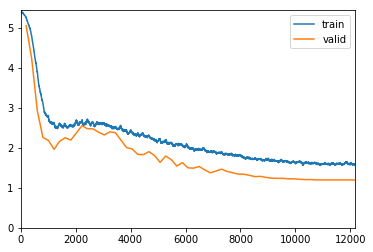

In [8]:
lr = 3e-3
wd = 1e-5
epochs = 60
learn.fit_one_cycle(epochs, max_lr=lr, wd=wd)

In [9]:
learn.save("b3_sz300_60epochs_010")

# B3, size=(300x300), 60 Epochs, normalize(imagenet_stats), zoom_crop 1.2, cutout p0.5, wd=1e-5, LabelSmoothing, mixup

In [5]:
try:
    learn.destroy()
    del learn
    gc.collect()
except Exception as e:
    print(e)

name 'learn' is not defined


In [6]:
xtra_tfms = zoom_crop(scale=(0.75,1.2), do_rand=True) + [cutout(n_holes=(1,4), length=(10, 40), p=0.5)]
tfms = get_transforms(xtra_tfms=xtra_tfms)
train_val_data, _ = get_train_test_data(tfms=tfms, bs=32, sz=(300, 300), normalize="imagenet")

In [7]:
eff_net = get_effnet(name="efficientnet-b3", pretrained=True, n_class=196)
learn = Learner(train_val_data, eff_net, loss_func=LabelSmoothingCrossEntropy(), 
                metrics=[accuracy], path='.', callback_fns=ShowGraph).mixup(alpha=0.2)
learn.to_fp16()

Getting pretrained efficientnet-b3
Loaded pretrained weights for efficientnet-b3
Parameter containing:
tensor([[ 0.0718, -0.0658, -0.0117,  ...,  0.0062,  0.0119,  0.0428],
        [ 0.0639, -0.0524, -0.0286,  ..., -0.0625,  0.0323, -0.0058],
        [ 0.0173,  0.0078, -0.0237,  ...,  0.0203, -0.0095,  0.0158],
        ...,
        [ 0.0250, -0.0226,  0.0317,  ...,  0.0056,  0.0121, -0.0259],
        [-0.0409,  0.0348,  0.0044,  ..., -0.0138, -0.0759, -0.0460],
        [-0.0812,  0.0199,  0.0363,  ..., -0.0296, -0.0574,  0.0551]],
       requires_grad=True)


Learner(data=ImageDataBunch;

Train: LabelList (6516 items)
x: ImageList
Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300)
y: CategoryList
Audi TTS Coupe 2012,Acura TL Sedan 2012,Dodge Dakota Club Cab 2007,Hyundai Sonata Hybrid Sedan 2012,Ford F-450 Super Duty Crew Cab 2012
Path: Data/cars_train;

Valid: LabelList (1628 items)
x: ImageList
Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300)
y: CategoryList
Plymouth Neon Coupe 1999,Honda Odyssey Minivan 2012,Aston Martin Virage Convertible 2012,Fisker Karma Sedan 2012,Audi S6 Sedan 2011
Path: Data/cars_train;

Test: None, model=EfficientNet(
  (_conv_stem): Conv2dSamePadding(3, 40, kernel_size=(3, 3), stride=(2, 2), bias=False)
  (_bn0): BatchNorm2d(40, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dSamePadding(40, 40, kernel_size

epoch,train_loss,valid_loss,accuracy,time
0,5.255710,5.044384,0.065111,01:34
1,4.651124,4.038998,0.225430,01:34
2,3.637526,2.740393,0.483415,01:33
3,2.849819,2.094747,0.657862,01:33
4,2.478132,1.893231,0.713145,01:34
5,2.332865,1.888494,0.702703,01:33
6,2.317989,2.151523,0.636978,01:33
7,2.342926,2.263163,0.609337,01:33
8,2.347319,2.330727,0.589066,01:33
9,2.327741,2.168817,0.646192,01:34


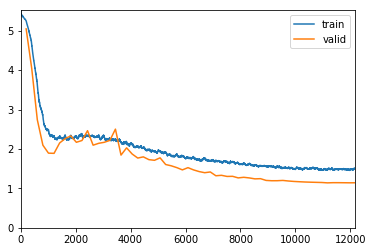

In [13]:
lr = 3e-3
wd = 1e-5
epochs = 60
learn.fit_one_cycle(epochs, max_lr=lr, wd=wd)

In [14]:
learn.save("b3_sz300_60epochs_011")

# B3, size=(300x300), 60 Epochs, normalize(imagenet_stats), zoom_crop 1.5, cutout 0.7, wd=1e-3, LabelSmoothing, mixup

acc = 

In [9]:
try:
    learn.destroy()
    del learn
    gc.collect()
except Exception as e:
    print(e)

this Learner object self-destroyed - it still exists, but no longer usable


In [10]:
xtra_tfms = zoom_crop(scale=(0.75,1.5), do_rand=True) + [cutout(n_holes=(1,4), length=(10, 40), p=0.7)]
tfms = get_transforms(xtra_tfms=xtra_tfms)
train_val_data = get_car_data(dataset='train', tfms=tfms, bs=32, sz=(300, 300), seed=42)

In [11]:
eff_net = get_effnet(name="efficientnet-b3", pretrained=True, n_class=196)
learn = Learner(train_val_data, eff_net, loss_func=LabelSmoothingCrossEntropy(), 
                metrics=[accuracy], path='.', callback_fns=ShowGraph).mixup(alpha=0.2)
learn.to_fp16()

Getting pretrained efficientnet-b3
Loaded pretrained weights for efficientnet-b3


Learner(data=ImageDataBunch;

Train: LabelList (6515 items)
x: ImageList
Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300)
y: CategoryList
Audi TTS Coupe 2012,Acura TL Sedan 2012,Dodge Dakota Club Cab 2007,Hyundai Sonata Hybrid Sedan 2012,Geo Metro Convertible 1993
Path: Data/cars_train;

Valid: LabelList (1629 items)
x: ImageList
Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300)
y: CategoryList
Ford Ranger SuperCab 2011,Toyota 4Runner SUV 2012,Aston Martin V8 Vantage Convertible 2012,Suzuki SX4 Sedan 2012,Audi RS 4 Convertible 2008
Path: Data/cars_train;

Test: None, model=EfficientNet(
  (_conv_stem): Conv2dSamePadding(3, 40, kernel_size=(3, 3), stride=(2, 2), bias=False)
  (_bn0): BatchNorm2d(40, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dSamePadding(40, 40, kernel_size=

epoch,train_loss,valid_loss,accuracy,time
0,5.254766,5.070622,0.062001,01:37
1,4.734318,4.097730,0.197667,01:36
2,3.784993,2.701973,0.508901,01:33
3,2.984835,2.050241,0.665439,01:34
4,2.549060,1.855017,0.720074,01:34
5,2.419740,1.975735,0.667281,01:34
6,2.432260,2.220763,0.624309,01:34
7,2.403581,2.125919,0.638429,01:33
8,2.408554,2.324325,0.596071,01:33
9,2.439300,2.115845,0.649478,01:33


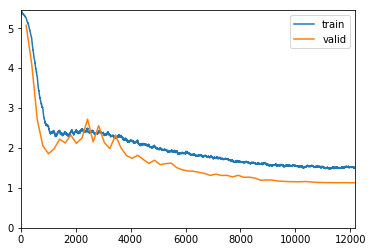

In [12]:
lr = 3e-3
wd = 1e-3
epochs = 60
learn.fit_one_cycle(epochs, max_lr=lr, wd=wd, div_factor=25, final_div=1e4)

In [13]:
learn.save("b3_sz300_60epochs_030")

# B3, size=(300x300), 60 Epochs, normalize(imagenet_stats), zoom_crop 1.5, cutout 0.7, wd=1e-3, LabelSmoothing, mixup, lr5e-3

In [14]:
try:
    learn.destroy()
    del learn
    gc.collect()
except Exception as e:
    print(e)

this Learner object self-destroyed - it still exists, but no longer usable


In [15]:
xtra_tfms = zoom_crop(scale=(0.75,1.5), do_rand=True) + [cutout(n_holes=(1,4), length=(10, 40), p=0.7)]
tfms = get_transforms(xtra_tfms=xtra_tfms)
train_val_data = get_car_data(dataset='train', tfms=tfms, bs=32, sz=(300, 300), seed=42)

In [16]:
eff_net = get_effnet(name="efficientnet-b3", pretrained=True, n_class=196)
learn = Learner(train_val_data, eff_net, loss_func=LabelSmoothingCrossEntropy(), 
                metrics=[accuracy], path='.', callback_fns=ShowGraph).mixup(alpha=0.2)
learn.to_fp16()

Getting pretrained efficientnet-b3
Loaded pretrained weights for efficientnet-b3


Learner(data=ImageDataBunch;

Train: LabelList (6515 items)
x: ImageList
Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300)
y: CategoryList
Audi TTS Coupe 2012,Acura TL Sedan 2012,Dodge Dakota Club Cab 2007,Hyundai Sonata Hybrid Sedan 2012,Geo Metro Convertible 1993
Path: Data/cars_train;

Valid: LabelList (1629 items)
x: ImageList
Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300)
y: CategoryList
Ford Ranger SuperCab 2011,Toyota 4Runner SUV 2012,Aston Martin V8 Vantage Convertible 2012,Suzuki SX4 Sedan 2012,Audi RS 4 Convertible 2008
Path: Data/cars_train;

Test: None, model=EfficientNet(
  (_conv_stem): Conv2dSamePadding(3, 40, kernel_size=(3, 3), stride=(2, 2), bias=False)
  (_bn0): BatchNorm2d(40, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dSamePadding(40, 40, kernel_size=

epoch,train_loss,valid_loss,accuracy,time
0,5.267406,5.062335,0.063229,01:33
1,4.766167,4.138817,0.222836,01:34
2,3.796250,2.711976,0.512584,01:34
3,2.958346,2.077964,0.670350,01:34
4,2.574997,1.902683,0.709638,01:33
5,2.460558,1.957203,0.681400,01:33
6,2.426749,1.978613,0.686925,01:33
7,2.425898,2.251124,0.606507,01:34
8,2.375660,2.055251,0.672192,01:34
9,2.438753,2.298700,0.604665,01:34


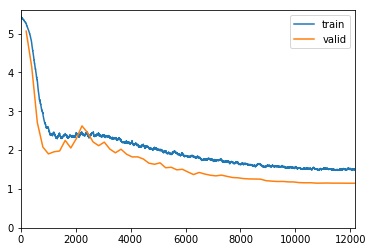

In [17]:
lr = 3e-3
wd = 1e-3
epochs = 60
learn.fit_one_cycle(epochs, max_lr=lr, wd=wd, div_factor=25, final_div=1e4)

In [18]:
learn.save("b3_sz300_60epochs_031")

# B3, size=(300x300), 60 Epochs, normalize(imagenet_stats), zoom_crop 1.5, cutout 0.7, wd=1e-3, LabelSmoothing, mixup 0.3

acc = 

In [19]:
try:
    learn.destroy()
    del learn
    gc.collect()
except Exception as e:
    print(e)

this Learner object self-destroyed - it still exists, but no longer usable


In [20]:
xtra_tfms = zoom_crop(scale=(0.75,1.5), do_rand=True) + [cutout(n_holes=(1,4), length=(10, 40), p=0.7)]
tfms = get_transforms(xtra_tfms=xtra_tfms)
train_val_data = get_car_data(dataset='train', tfms=tfms, bs=32, sz=(300, 300), seed=42)

In [21]:
eff_net = get_effnet(name="efficientnet-b3", pretrained=True, n_class=196)
learn = Learner(train_val_data, eff_net, loss_func=LabelSmoothingCrossEntropy(), 
                metrics=[accuracy], path='.', callback_fns=ShowGraph).mixup(alpha=0.3)
learn.to_fp16()

Getting pretrained efficientnet-b3
Loaded pretrained weights for efficientnet-b3


Learner(data=ImageDataBunch;

Train: LabelList (6515 items)
x: ImageList
Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300)
y: CategoryList
Audi TTS Coupe 2012,Acura TL Sedan 2012,Dodge Dakota Club Cab 2007,Hyundai Sonata Hybrid Sedan 2012,Geo Metro Convertible 1993
Path: Data/cars_train;

Valid: LabelList (1629 items)
x: ImageList
Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300)
y: CategoryList
Ford Ranger SuperCab 2011,Toyota 4Runner SUV 2012,Aston Martin V8 Vantage Convertible 2012,Suzuki SX4 Sedan 2012,Audi RS 4 Convertible 2008
Path: Data/cars_train;

Test: None, model=EfficientNet(
  (_conv_stem): Conv2dSamePadding(3, 40, kernel_size=(3, 3), stride=(2, 2), bias=False)
  (_bn0): BatchNorm2d(40, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dSamePadding(40, 40, kernel_size=

epoch,train_loss,valid_loss,accuracy,time
0,5.266504,5.083523,0.055249,01:33
1,4.823780,4.208163,0.203806,01:33
2,3.966285,2.819218,0.464088,01:34
3,3.174504,2.127590,0.637815,01:33
4,2.777739,1.827493,0.724985,01:33
5,2.602886,1.929428,0.677716,01:33
6,2.611265,1.959166,0.684469,01:33
7,2.561466,1.977829,0.687538,01:34
8,2.576785,2.160239,0.632904,01:33
9,2.644082,2.198447,0.621240,01:33


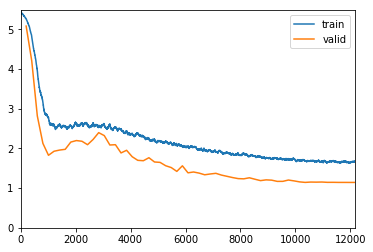

In [22]:
lr = 3e-3
wd = 1e-3
epochs = 60
learn.fit_one_cycle(epochs, max_lr=lr, wd=wd, div_factor=25, final_div=1e4)

In [23]:
learn.save("b3_sz300_60epochs_033")

# B3, size=(300x300), 60 Epochs, normalize(imagenet_stats), zoom_crop 1.5, cutout 0.7, wd=1e-3, LabelSmoothing, mixup 0.3, lr=5e-3

acc = 

In [3]:
try:
    learn.destroy()
    del learn
    gc.collect()
except Exception as e:
    print(e)

name 'learn' is not defined


In [4]:
xtra_tfms = zoom_crop(scale=(0.75,1.5), do_rand=True) + [cutout(n_holes=(1,4), length=(10, 40), p=0.7)]
tfms = get_transforms(xtra_tfms=xtra_tfms)
train_val_data = get_car_data(dataset='train', tfms=tfms, bs=32, sz=(300, 300), seed=42)

In [5]:
eff_net = get_effnet(name="efficientnet-b3", pretrained=True, n_class=196)
learn = Learner(train_val_data, eff_net, loss_func=LabelSmoothingCrossEntropy(), 
                metrics=[accuracy], path='.', callback_fns=ShowGraph).mixup(alpha=0.3)
learn.to_fp16()

Getting pretrained efficientnet-b3
Loaded pretrained weights for efficientnet-b3


Learner(data=ImageDataBunch;

Train: LabelList (6515 items)
x: ImageList
Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300)
y: CategoryList
Audi TTS Coupe 2012,Acura TL Sedan 2012,Dodge Dakota Club Cab 2007,Hyundai Sonata Hybrid Sedan 2012,Geo Metro Convertible 1993
Path: Data/cars_train;

Valid: LabelList (1629 items)
x: ImageList
Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300)
y: CategoryList
Ford Ranger SuperCab 2011,Toyota 4Runner SUV 2012,Aston Martin V8 Vantage Convertible 2012,Suzuki SX4 Sedan 2012,Audi RS 4 Convertible 2008
Path: Data/cars_train;

Test: None, model=EfficientNet(
  (_conv_stem): Conv2dSamePadding(3, 40, kernel_size=(3, 3), stride=(2, 2), bias=False)
  (_bn0): BatchNorm2d(40, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dSamePadding(40, 40, kernel_size=

epoch,train_loss,valid_loss,accuracy,time
0,5.153495,4.735365,0.103745,01:33
1,4.279287,3.265375,0.356047,01:33
2,3.285966,2.252004,0.602210,01:33
3,2.878546,1.970629,0.661142,01:34
4,2.755478,2.073225,0.636587,01:34
5,2.701175,2.384966,0.564150,01:34
6,2.749897,2.377763,0.576427,01:34
7,2.750475,2.753395,0.486188,01:34
8,2.860522,2.464319,0.572744,01:34
9,2.896548,2.681070,0.518109,01:35


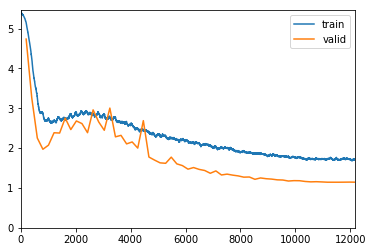

In [6]:
lr = 5e-3
wd = 1e-3
epochs = 60
learn.fit_one_cycle(epochs, max_lr=lr, wd=wd, div_factor=25, final_div=1e4)

In [7]:
learn.save("b3_sz300_60epochs_034")

# B3, size=(300x300), 40 Epochs, normalize(imagenet_stats), zoom_crop 1.5, cutout 0.7, wd=1e-3, LabelSmoothing, mixup 0.3, lr=5e-3

acc = 

In [8]:
try:
    learn.destroy()
    del learn
    gc.collect()
except Exception as e:
    print(e)

this Learner object self-destroyed - it still exists, but no longer usable


In [9]:
xtra_tfms = zoom_crop(scale=(0.75,1.5), do_rand=True) + [cutout(n_holes=(1,4), length=(10, 40), p=0.7)]
tfms = get_transforms(xtra_tfms=xtra_tfms)
train_val_data = get_car_data(dataset='train', tfms=tfms, bs=32, sz=(300, 300), seed=42)

In [10]:
eff_net = get_effnet(name="efficientnet-b3", pretrained=True, n_class=196)
learn = Learner(train_val_data, eff_net, loss_func=LabelSmoothingCrossEntropy(), 
                metrics=[accuracy], path='.', callback_fns=ShowGraph).mixup(alpha=0.3)
learn.to_fp16()

Getting pretrained efficientnet-b3
Loaded pretrained weights for efficientnet-b3


Learner(data=ImageDataBunch;

Train: LabelList (6515 items)
x: ImageList
Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300)
y: CategoryList
Audi TTS Coupe 2012,Acura TL Sedan 2012,Dodge Dakota Club Cab 2007,Hyundai Sonata Hybrid Sedan 2012,Geo Metro Convertible 1993
Path: Data/cars_train;

Valid: LabelList (1629 items)
x: ImageList
Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300)
y: CategoryList
Ford Ranger SuperCab 2011,Toyota 4Runner SUV 2012,Aston Martin V8 Vantage Convertible 2012,Suzuki SX4 Sedan 2012,Audi RS 4 Convertible 2008
Path: Data/cars_train;

Test: None, model=EfficientNet(
  (_conv_stem): Conv2dSamePadding(3, 40, kernel_size=(3, 3), stride=(2, 2), bias=False)
  (_bn0): BatchNorm2d(40, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dSamePadding(40, 40, kernel_size=

epoch,train_loss,valid_loss,accuracy,time
0,5.136203,4.721169,0.109269,01:34
1,4.107844,2.958656,0.402701,01:34
2,3.290184,2.494793,0.526090,01:34
3,2.979613,2.770826,0.456108,01:34
4,3.007500,3.031933,0.404543,01:33
5,3.050385,2.681997,0.471455,01:33
6,3.105515,3.239372,0.392265,01:34
7,3.117231,3.378519,0.336403,01:34
8,3.102044,2.989763,0.427256,01:34
9,3.122391,3.488028,0.319214,01:33


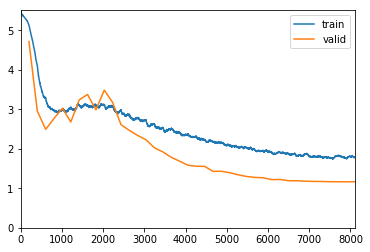

In [11]:
lr = 5e-3
wd = 1e-3
epochs = 40
learn.fit_one_cycle(epochs, max_lr=lr, wd=wd, div_factor=25, final_div=1e4)

In [12]:
learn.save("b3_sz300_60epochs_035")

# B0, size=(300x300), 60 Epochs, normalize(imagenet_stats), zoom_crop 1.5, cutout 0.7, wd=1e-3, LabelSmoothing, mixup 0.3, lr=5e-3

acc = 

In [13]:
try:
    learn.destroy()
    del learn
    gc.collect()
except Exception as e:
    print(e)

this Learner object self-destroyed - it still exists, but no longer usable


In [14]:
xtra_tfms = zoom_crop(scale=(0.75,1.5), do_rand=True) + [cutout(n_holes=(1,4), length=(10, 40), p=0.7)]
tfms = get_transforms(xtra_tfms=xtra_tfms)
train_val_data = get_car_data(dataset='train', tfms=tfms, bs=32, sz=(300, 300), seed=42)

In [15]:
eff_net = get_effnet(name="efficientnet-b0", pretrained=True, n_class=196)
learn = Learner(train_val_data, eff_net, loss_func=LabelSmoothingCrossEntropy(), 
                metrics=[accuracy], path='.', callback_fns=ShowGraph).mixup(alpha=0.3)
learn.to_fp16()

Getting pretrained efficientnet-b0
Loaded pretrained weights for efficientnet-b0


Learner(data=ImageDataBunch;

Train: LabelList (6515 items)
x: ImageList
Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300)
y: CategoryList
Audi TTS Coupe 2012,Acura TL Sedan 2012,Dodge Dakota Club Cab 2007,Hyundai Sonata Hybrid Sedan 2012,Geo Metro Convertible 1993
Path: Data/cars_train;

Valid: LabelList (1629 items)
x: ImageList
Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300)
y: CategoryList
Ford Ranger SuperCab 2011,Toyota 4Runner SUV 2012,Aston Martin V8 Vantage Convertible 2012,Suzuki SX4 Sedan 2012,Audi RS 4 Convertible 2008
Path: Data/cars_train;

Test: None, model=EfficientNet(
  (_conv_stem): Conv2dSamePadding(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
  (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dSamePadding(32, 32, kernel_size=

epoch,train_loss,valid_loss,accuracy,time
0,5.186445,4.891098,0.082259,00:58
1,4.503729,3.740111,0.241252,00:58
2,3.647822,2.722270,0.481891,00:58
3,3.098663,2.139467,0.618785,00:59
4,2.839889,2.361413,0.571516,00:58
5,2.843032,2.207134,0.594843,00:58
6,2.764859,2.475400,0.537753,00:58
7,2.887105,2.697722,0.521179,00:58
8,2.875844,2.881434,0.464088,00:58
9,2.909638,2.962913,0.419890,00:58


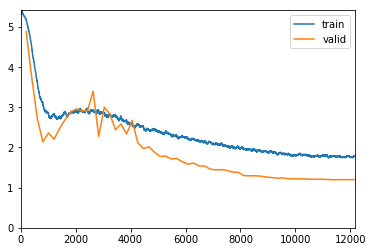

In [16]:
lr = 5e-3
wd = 1e-3
epochs = 60
learn.fit_one_cycle(epochs, max_lr=lr, wd=wd, div_factor=25, final_div=1e4)

In [17]:
learn.save("b0_sz300_60epochs_040")

# B0, size=(300x300), 60 Epochs, normalize(imagenet_stats), zoom_crop 1.5, cutout 0.7, wd=1e-3, LabelSmoothing, mixup 0.3, lr=3e-3

acc = 

In [18]:
try:
    learn.destroy()
    del learn
    gc.collect()
except Exception as e:
    print(e)

this Learner object self-destroyed - it still exists, but no longer usable


In [19]:
xtra_tfms = zoom_crop(scale=(0.75,1.5), do_rand=True) + [cutout(n_holes=(1,4), length=(10, 40), p=0.7)]
tfms = get_transforms(xtra_tfms=xtra_tfms)
train_val_data = get_car_data(dataset='train', tfms=tfms, bs=32, sz=(300, 300), seed=42)

In [20]:
eff_net = get_effnet(name="efficientnet-b0", pretrained=True, n_class=196)
learn = Learner(train_val_data, eff_net, loss_func=LabelSmoothingCrossEntropy(), 
                metrics=[accuracy], path='.', callback_fns=ShowGraph).mixup(alpha=0.3)
learn.to_fp16()

Getting pretrained efficientnet-b0
Loaded pretrained weights for efficientnet-b0


Learner(data=ImageDataBunch;

Train: LabelList (6515 items)
x: ImageList
Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300)
y: CategoryList
Audi TTS Coupe 2012,Acura TL Sedan 2012,Dodge Dakota Club Cab 2007,Hyundai Sonata Hybrid Sedan 2012,Geo Metro Convertible 1993
Path: Data/cars_train;

Valid: LabelList (1629 items)
x: ImageList
Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300)
y: CategoryList
Ford Ranger SuperCab 2011,Toyota 4Runner SUV 2012,Aston Martin V8 Vantage Convertible 2012,Suzuki SX4 Sedan 2012,Audi RS 4 Convertible 2008
Path: Data/cars_train;

Test: None, model=EfficientNet(
  (_conv_stem): Conv2dSamePadding(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
  (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dSamePadding(32, 32, kernel_size=

epoch,train_loss,valid_loss,accuracy,time
0,5.263177,5.107558,0.042971,00:58
1,4.909036,4.375433,0.146102,00:58
2,4.199895,3.171041,0.392265,00:58
3,3.435989,2.355312,0.581952,00:58
4,3.004150,2.092425,0.642726,00:58
5,2.770062,1.949086,0.697360,00:58
6,2.664863,2.141079,0.639042,00:58
7,2.635767,2.117833,0.658072,00:59
8,2.651011,2.084347,0.650092,00:58
9,2.645886,2.141390,0.659300,00:58


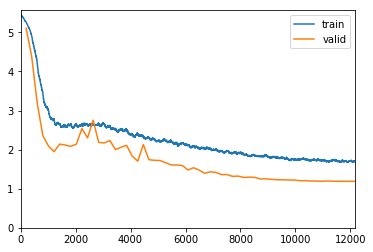

In [21]:
lr = 3e-3
wd = 1e-3
epochs = 60
learn.fit_one_cycle(epochs, max_lr=lr, wd=wd, div_factor=25, final_div=1e4)

In [22]:
learn.save("b0_sz300_60epochs_041")

In [23]:
learn.export("exported_models/b0_sz300_09282")

# fin